In [1]:
import random
import itertools
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2025, 2, 24)

tickers = ['AAPL','MSFT','F','BAC','NKE','V','DIS']

n_tickers_selected = 4
n_combinations = 20

sampled_combinations = random.sample(list(itertools.combinations(tickers, n_tickers_selected)), n_combinations)

In [3]:
all_portfolios = []
rf = 0.0415

for combination in sampled_combinations:
    data = yf.download(list(combination), start= start_date, end = end_date, progress= False)["Close"]
    returns = data.pct_change().dropna()
    covariance_matrix = returns.cov()

    annual_returns = returns.mean() * 252
    annual_cov = covariance_matrix * 252

    # Numero de simulaciones de ponderaciones
    num_portafolios = 10000

    weights_array = np.zeros((num_portafolios, n_tickers_selected))
    returns_array = np.zeros(num_portafolios)
    risk_array = np.zeros(num_portafolios)
    sharpe_array = np.zeros(num_portafolios)

    for i in range(num_portafolios):
        # generas los pesos aleatorios para cada portafolio
        weights = np.random.random(n_tickers_selected)
        weights = weights / np.sum(weights)

        # obteniendo rendimiento y volatilidad esperada anual por portafolio
        portfolio_return = np.dot(annual_returns, weights)
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

        # guardando historicos
        weights_array[i, :] = weights
        returns_array[i] = portfolio_return
        risk_array[i] = portfolio_risk
        sharpe_array[i] = (portfolio_return - rf) / portfolio_risk

    portfolios = pd.DataFrame({
        "Returns": returns_array,
        "Risk": risk_array,
        "Sharpe": sharpe_array
    })

    for i, symbol in enumerate(combination):
        portfolios[symbol + " Weight"] = weights_array[:, i]

    all_portfolios.append(portfolios)

YF.download() has changed argument auto_adjust default to True


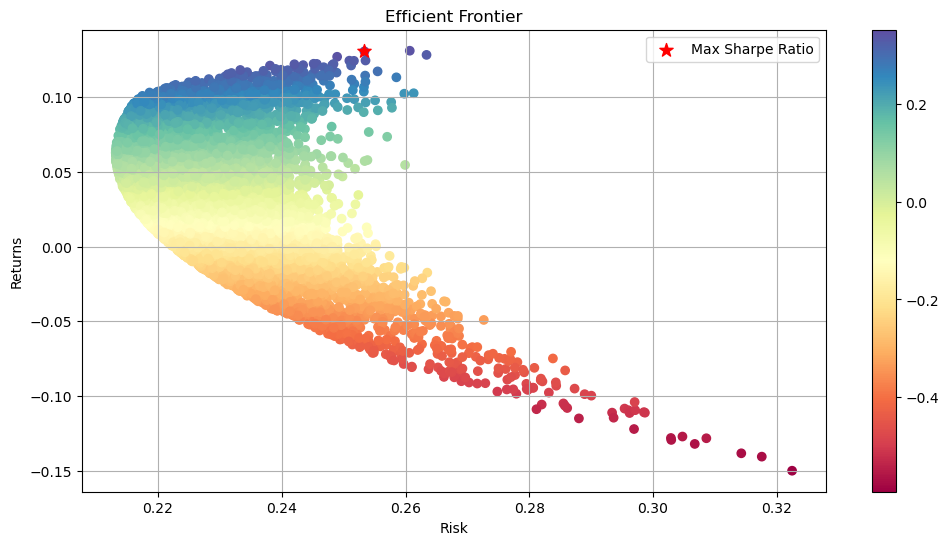

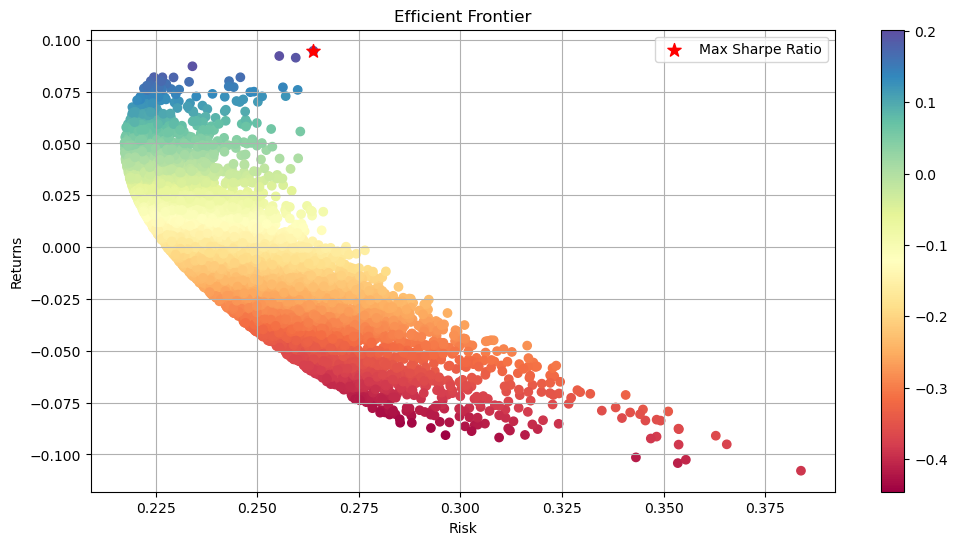

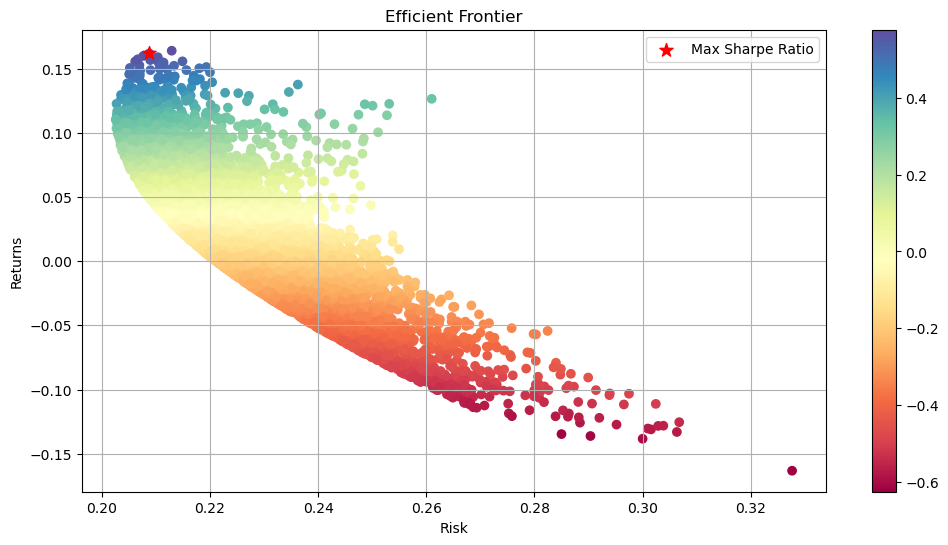

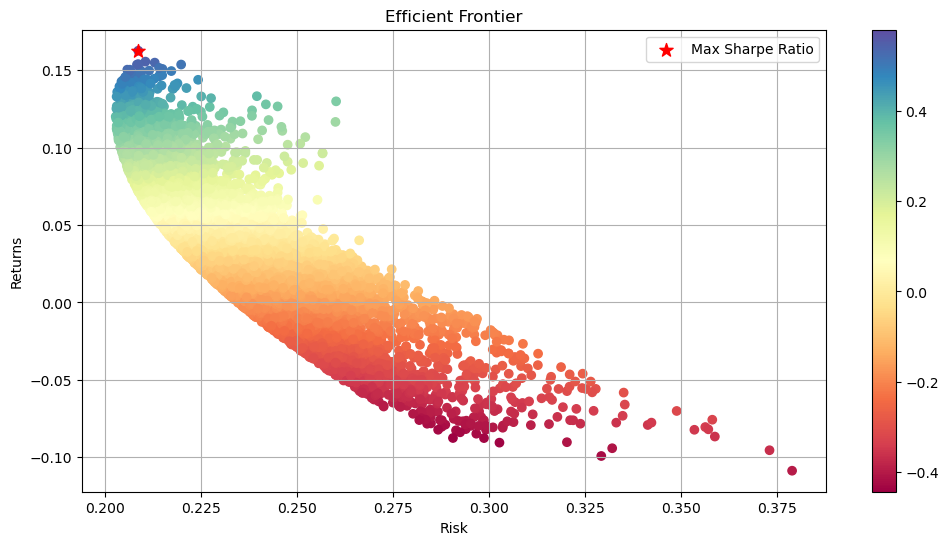

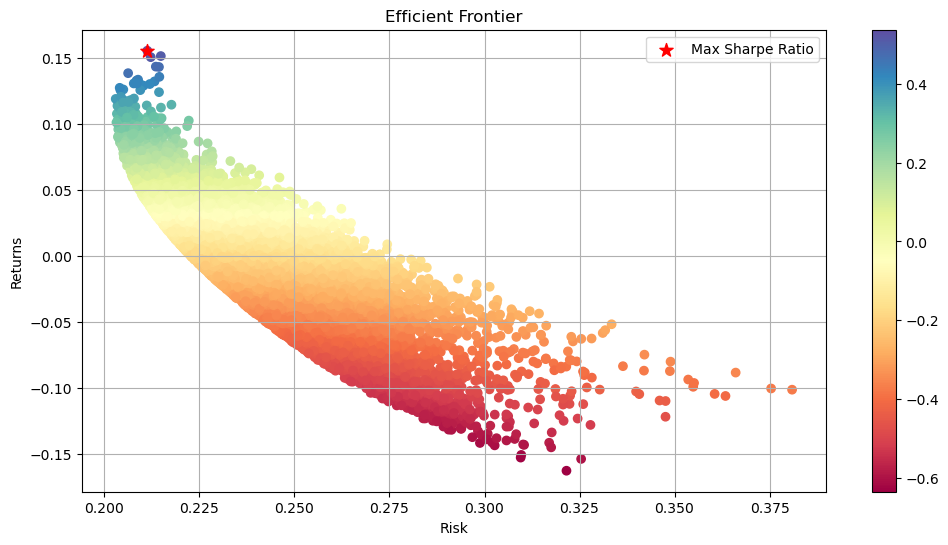

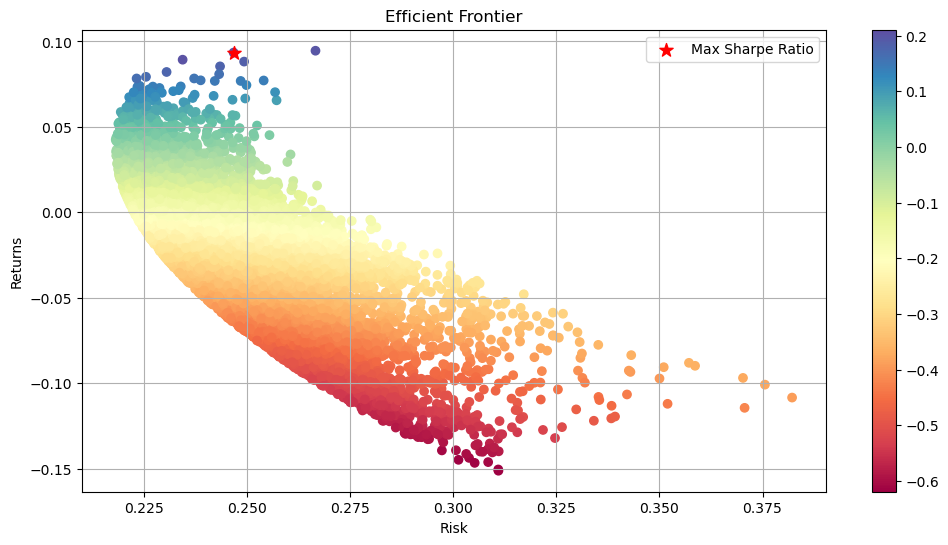

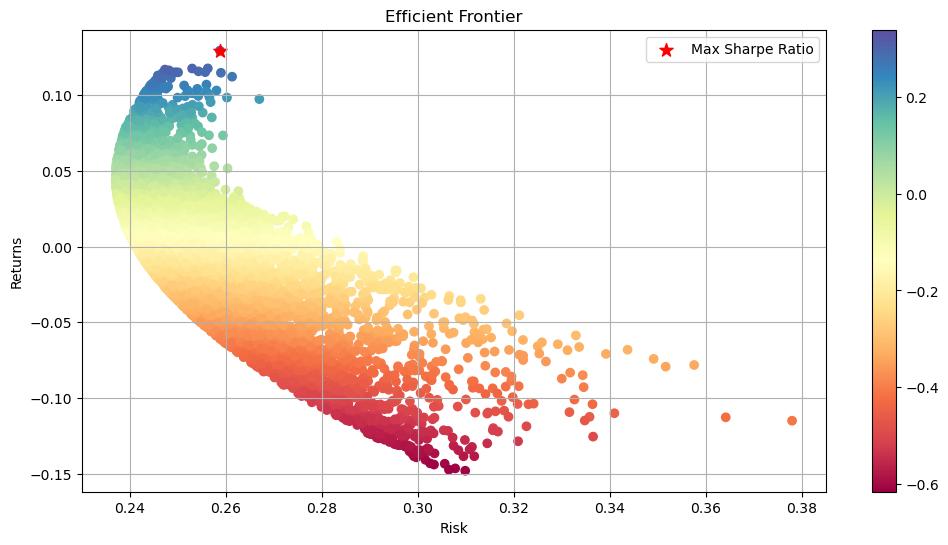

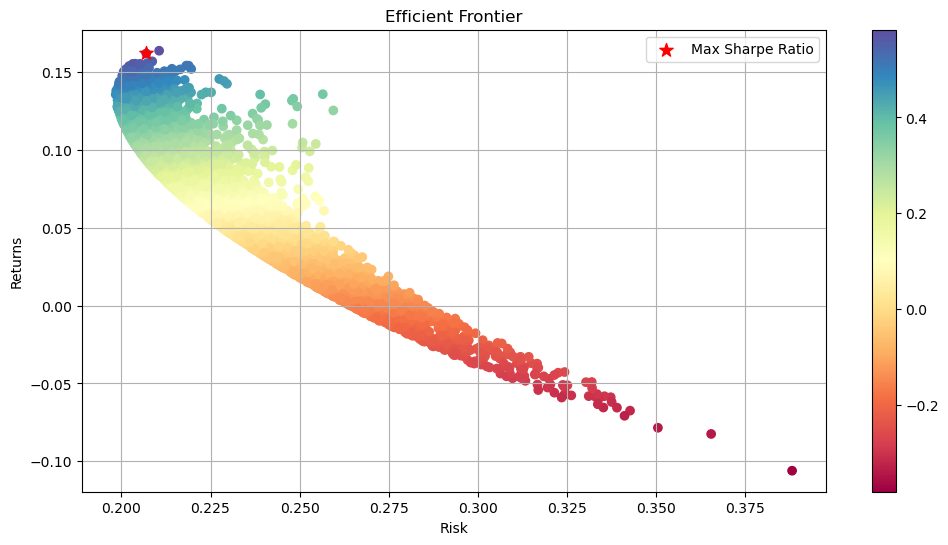

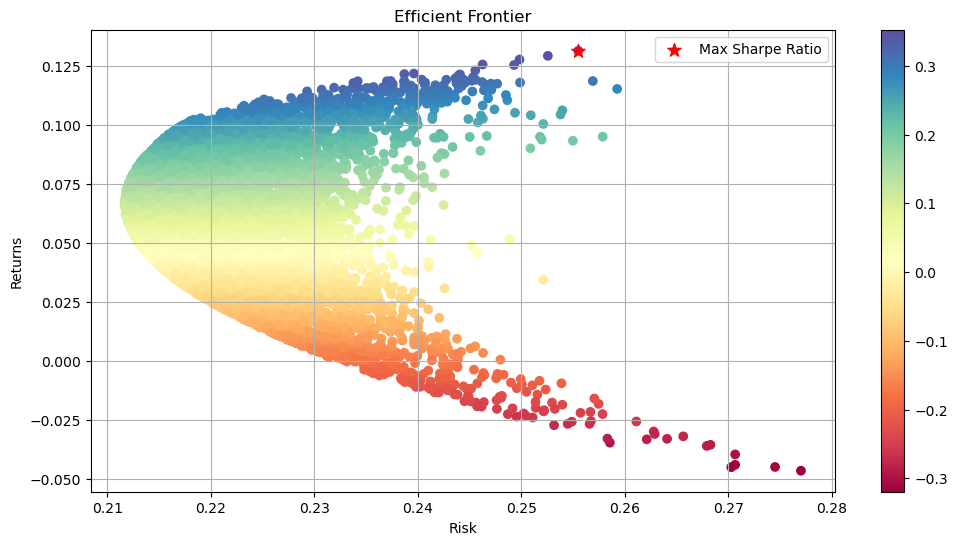

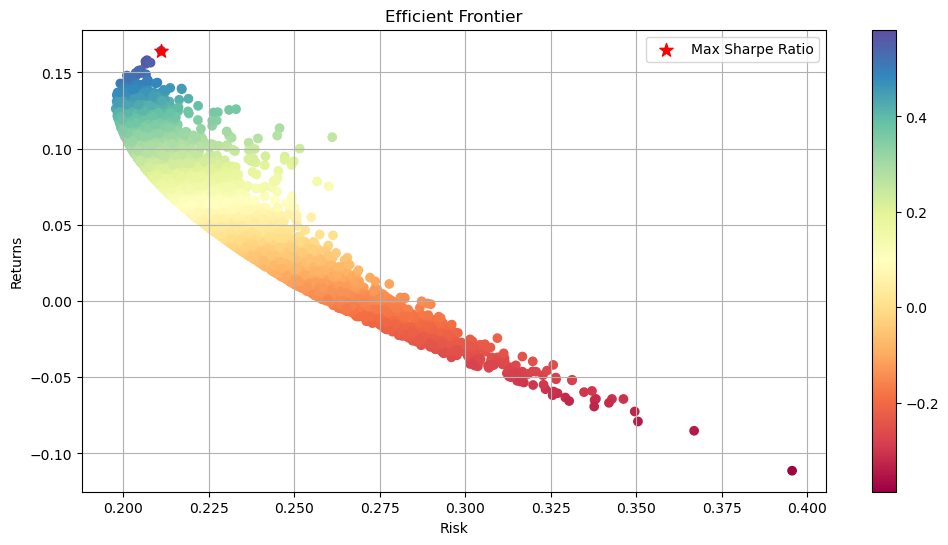

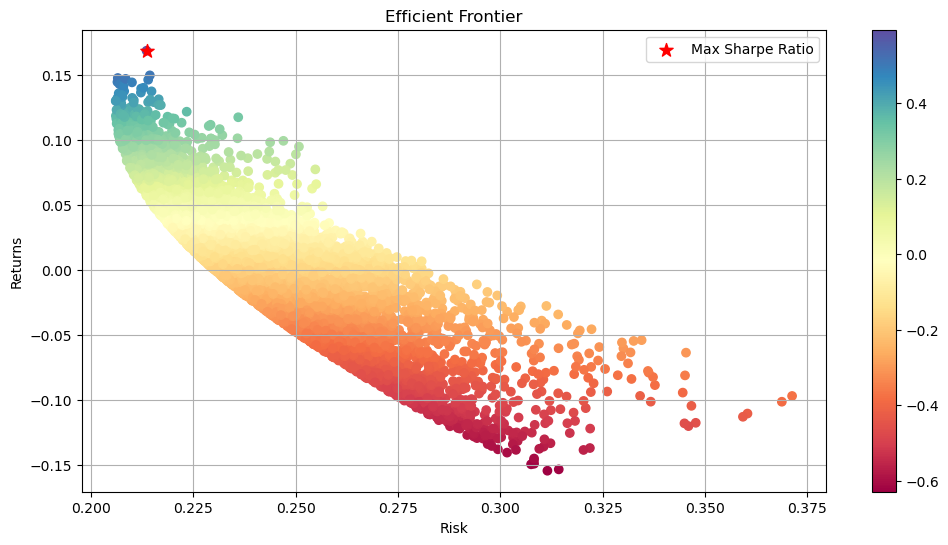

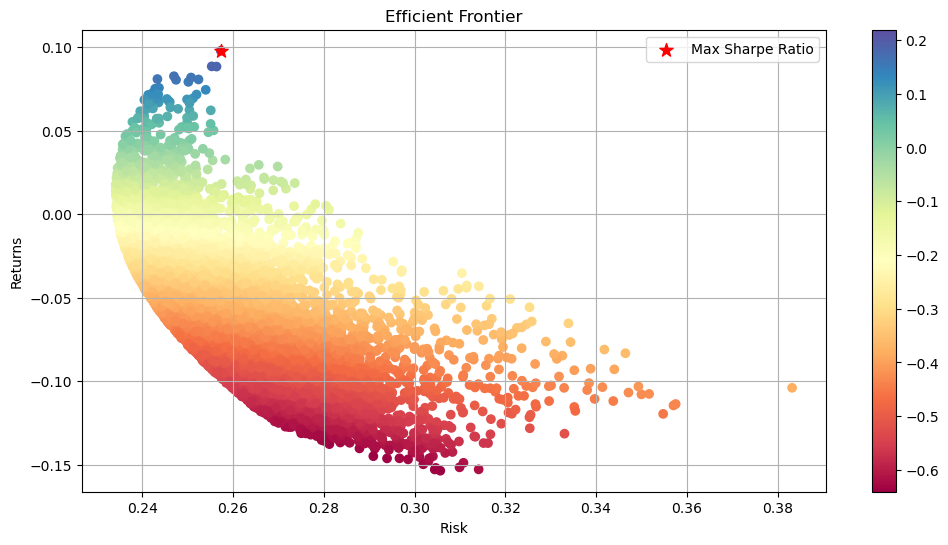

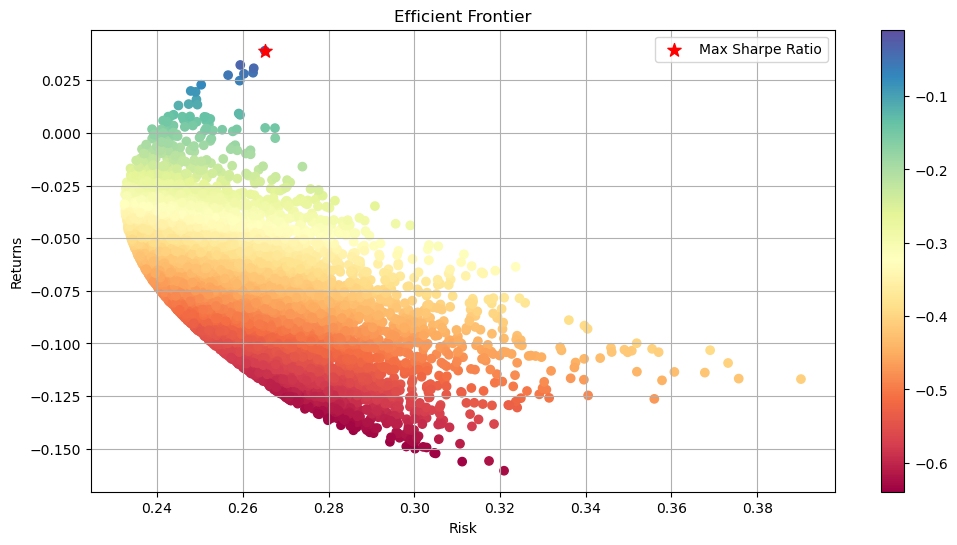

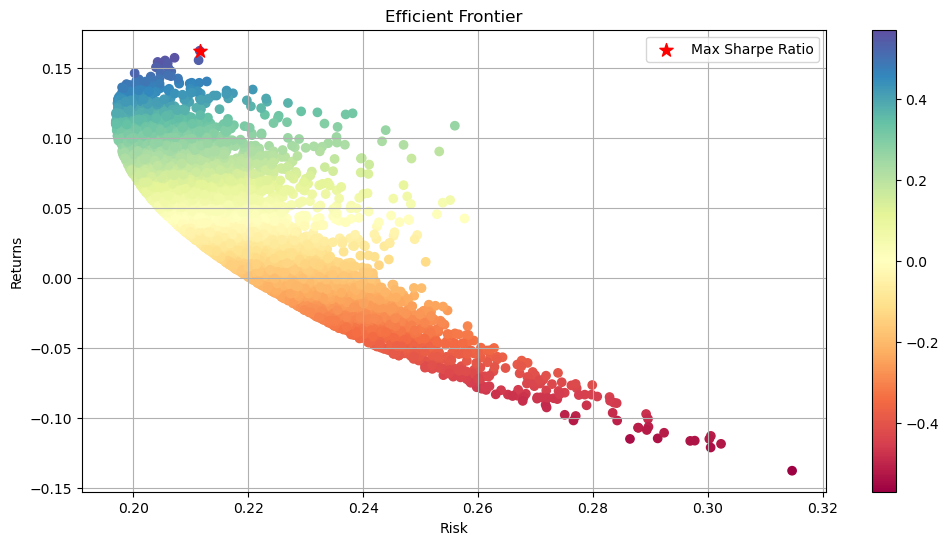

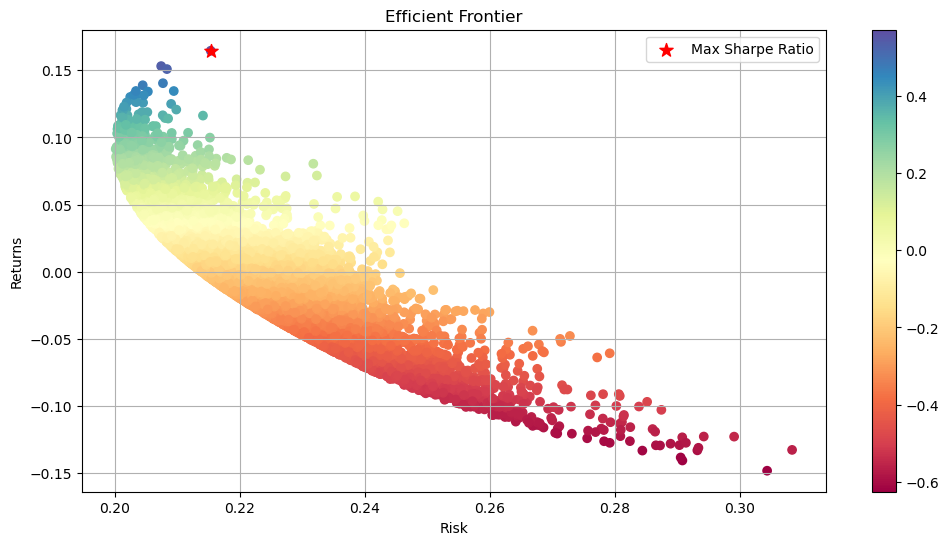

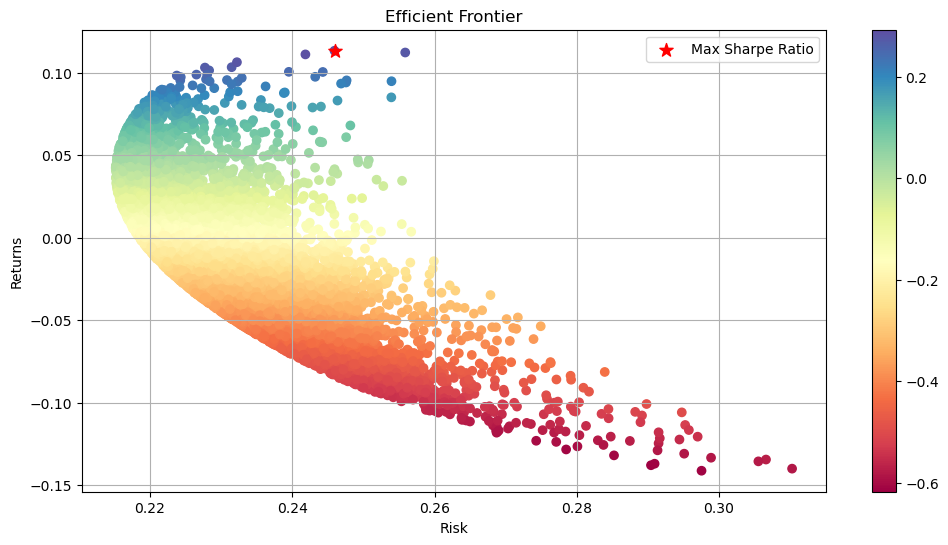

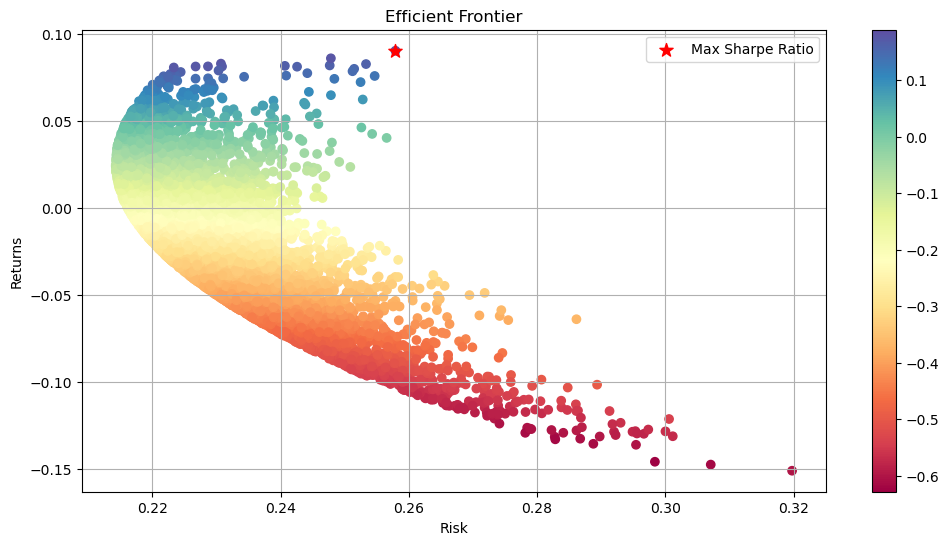

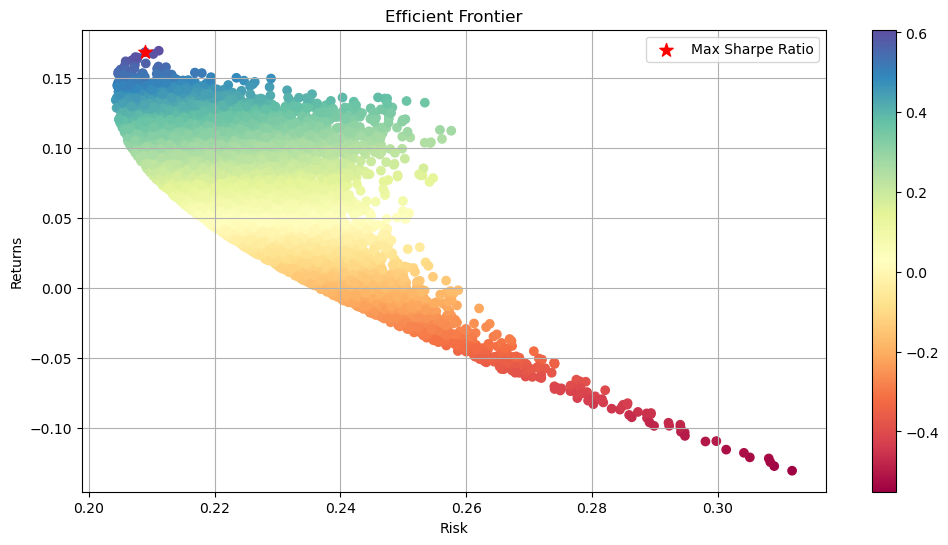

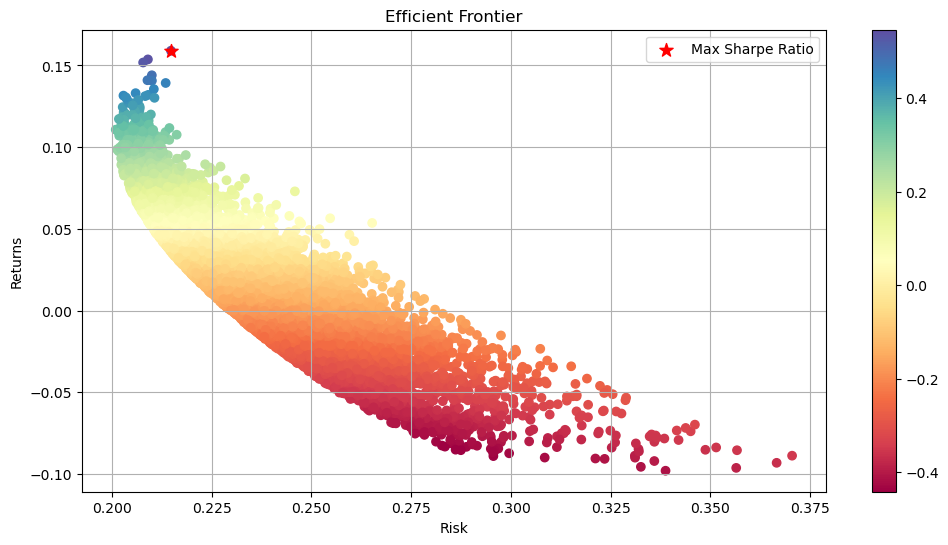

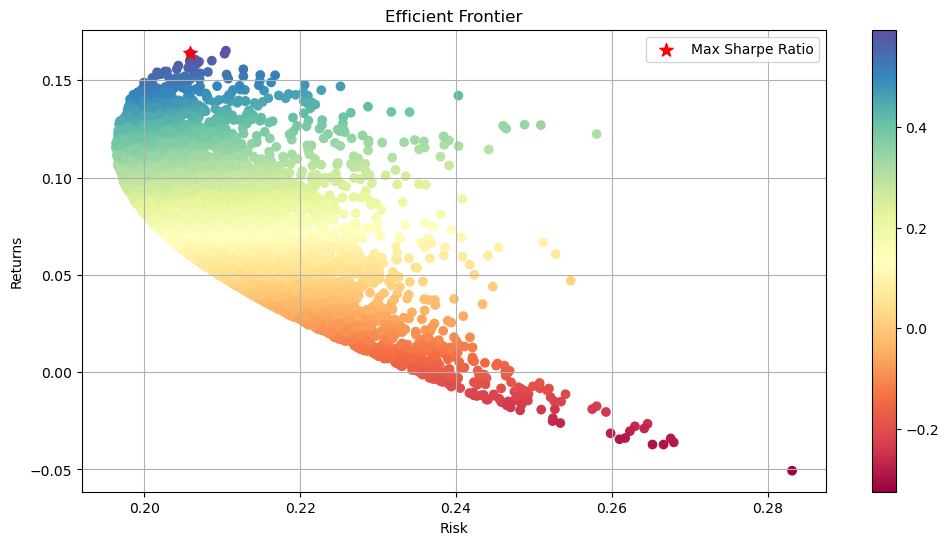

In [4]:
for i in range(n_combinations):
    plt.figure(figsize=(12, 6))
    sharpe_values = all_portfolios[i]['Sharpe']
    vmin = sharpe_values.min()
    vmax = sharpe_values.max()
    scatter = plt.scatter(all_portfolios[i]['Risk'], all_portfolios[i]['Returns'], c=sharpe_values, cmap='Spectral', vmin=vmin, vmax=vmax)

    max_sharpe_idx = all_portfolios[i]['Sharpe'].idxmax()
    max_sharpe = all_portfolios[i].loc[max_sharpe_idx]
    plt.scatter(max_sharpe['Risk'], max_sharpe['Returns'], c='red', s=100, marker='*', label='Max Sharpe Ratio')

    plt.xlabel('Risk')
    plt.ylabel('Returns')
    plt.title('Efficient Frontier')
    plt.legend()
    plt.colorbar(scatter)
    plt.grid()
    plt.show()

In [6]:
todo = pd.concat(all_portfolios)
todo = todo.fillna(0)
top_10 = todo.nlargest(10, 'Sharpe')
top_10

,Returns,Risk,Sharpe,AAPL Weight,MSFT Weight,BAC Weight,NKE Weight,F Weight,DIS Weight,V Weight
9232,0.168311,0.208934,0.606943,0.092511,0.078073,0.000000,0.000514,0.000000,0.000000,0.828902
2031,0.169315,0.211099,0.605473,0.082440,0.039853,0.000000,0.006084,0.000000,0.000000,0.871624
9616,0.166963,0.210234,0.596778,0.057871,0.075396,0.000000,0.008740,0.000000,0.000000,0.857992
8598,0.164793,0.207381,0.594523,0.110798,0.094871,0.000000,0.005311,0.000000,0.000000,0.789019
7655,0.168453,0.213597,0.594359,0.000000,0.009930,0.000000,0.003240,0.071988,0.000000,0.914842
8895,0.163832,0.205906,0.594113,0.202296,0.000000,0.042608,0.000000,0.000000,0.753933,0.001164
2616,0.164473,0.207741,0.591954,0.282298,0.015156,0.000000,0.002359,0.000000,0.000000,0.700187
2305,0.165226,0.210461,0.587879,0.025483,0.000000,0.087750,0.000000,0.000000,0.886125,0.000642
3201,0.163176,0.207623,0.586044,0.301753,0.023627,0.000000,0.002275,0.000000,0.000000,0.672345
5395,0.162557,0.206840,0.585271,0.050941,0.189489,0.000000,0.000264,0.000000,0.000000,0.759306
